In [1]:
!pip install matplotlib
!pip install seaborn
!pip install joblib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
energy_df = pd.read_csv("Energy_consumption.csv")
display(energy_df.shape)
energy_df.head()

(1000, 11)

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [4]:

#The 'Timestamp' column is converted into a proper datetime format.the column  is likely  initially read  as a string or a number  converting it  to a proper  datetime  format allows  pandas and other  libraries   to recognize  it  as  time data and enable time based operations and analysis
energy_df['Timestamp'] = pd.to_datetime(energy_df['Timestamp'], utc=True, infer_datetime_format=True)
energy_df = energy_df.set_index('Timestamp')#allows  you to easily select  and manipulate data based  on  time ranges and often  required   for  certain  time series functions
energy_df.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00+00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00+00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00+00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00+00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00+00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [5]:
#Define a function to plot different types of time-series
#A function plot_series() is defined to plot time series data with flexible options for labels, titles, and series.
#The function creates a large plot and can accept a column from a DataFrame or a standalone series.
def plot_series(df=None, column=None, series=pd.Series([]),
                label=None, ylabel=None, title=None, start=0, end=None):
#set sets the  default  style  for seaborn  plots enhancing visual appearance
#fig  creates a  matplotlib figure  and axes for the plot
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=30)#x axis
    if column:#if  the column parameter is provided itplots  the specified column in dataframe
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=30)
    if series.any():#If the series parameter is provided and contains data, it plots the series directly.
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=30)
    if label:#If the label parameter is provided, it adds a legend to the plot.
        ax.legend(fontsize=16)
    if title:#If the title parameter is provided, it sets the title of the plot.
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax
    #ax is defined to plot all the plottings


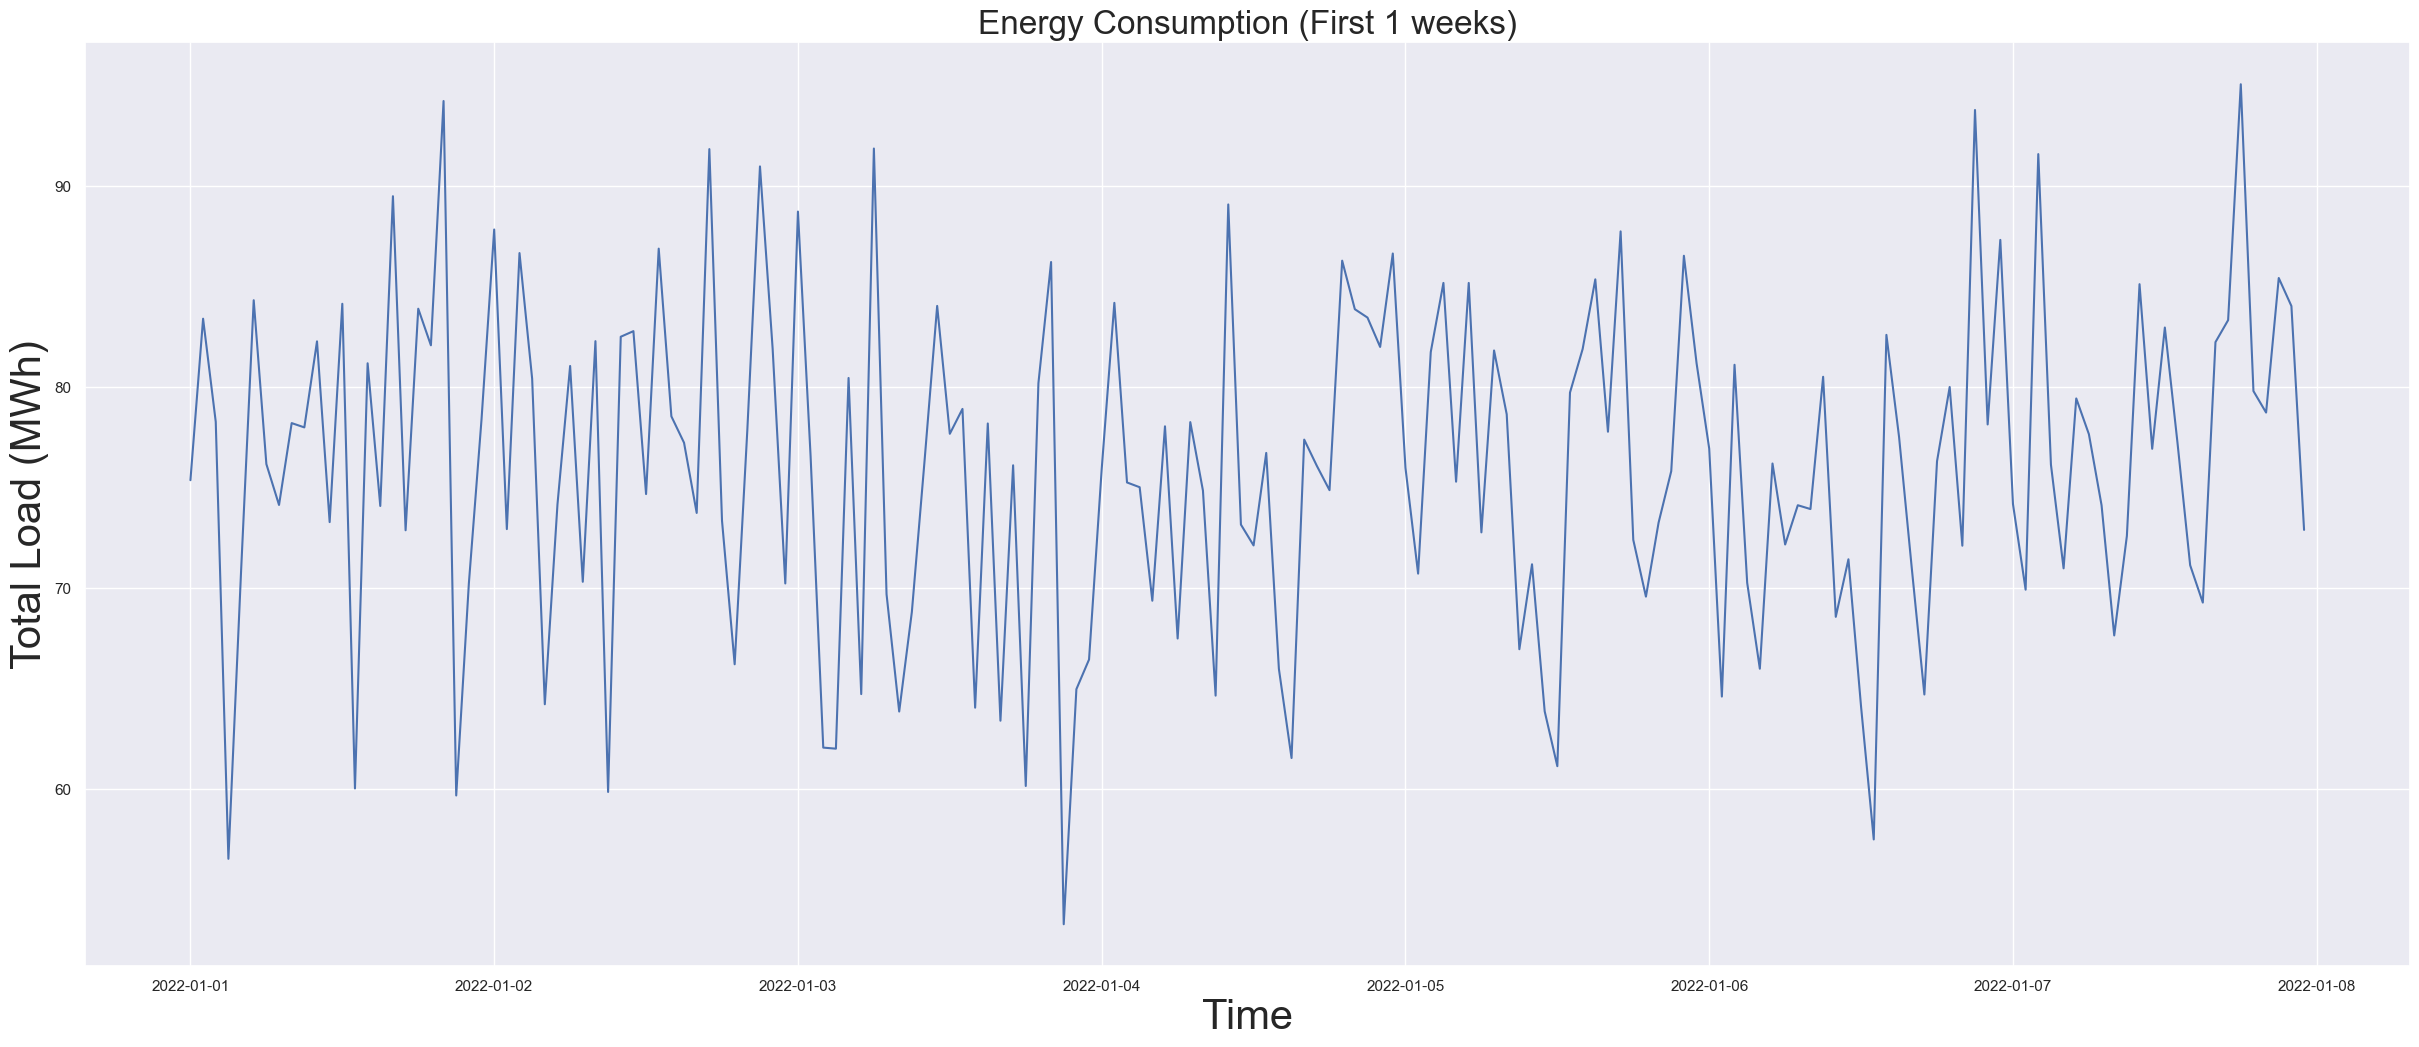

In [6]:
# Zoom into the plot of the hourly (actual) total load
#This line uses the plot_series() function to visualize the 'EnergyConsumption' column over the first week (7 days * 24 hours).
ax = plot_series(df=energy_df, column='EnergyConsumption', ylabel='Total Load (MWh)',
                 title='Energy Consumption (First 1 weeks)', end=24*7)
plt.show()
#end=24*7: Limits the plot to the first week of data (24 hours/day * 7 days = 168 hours).

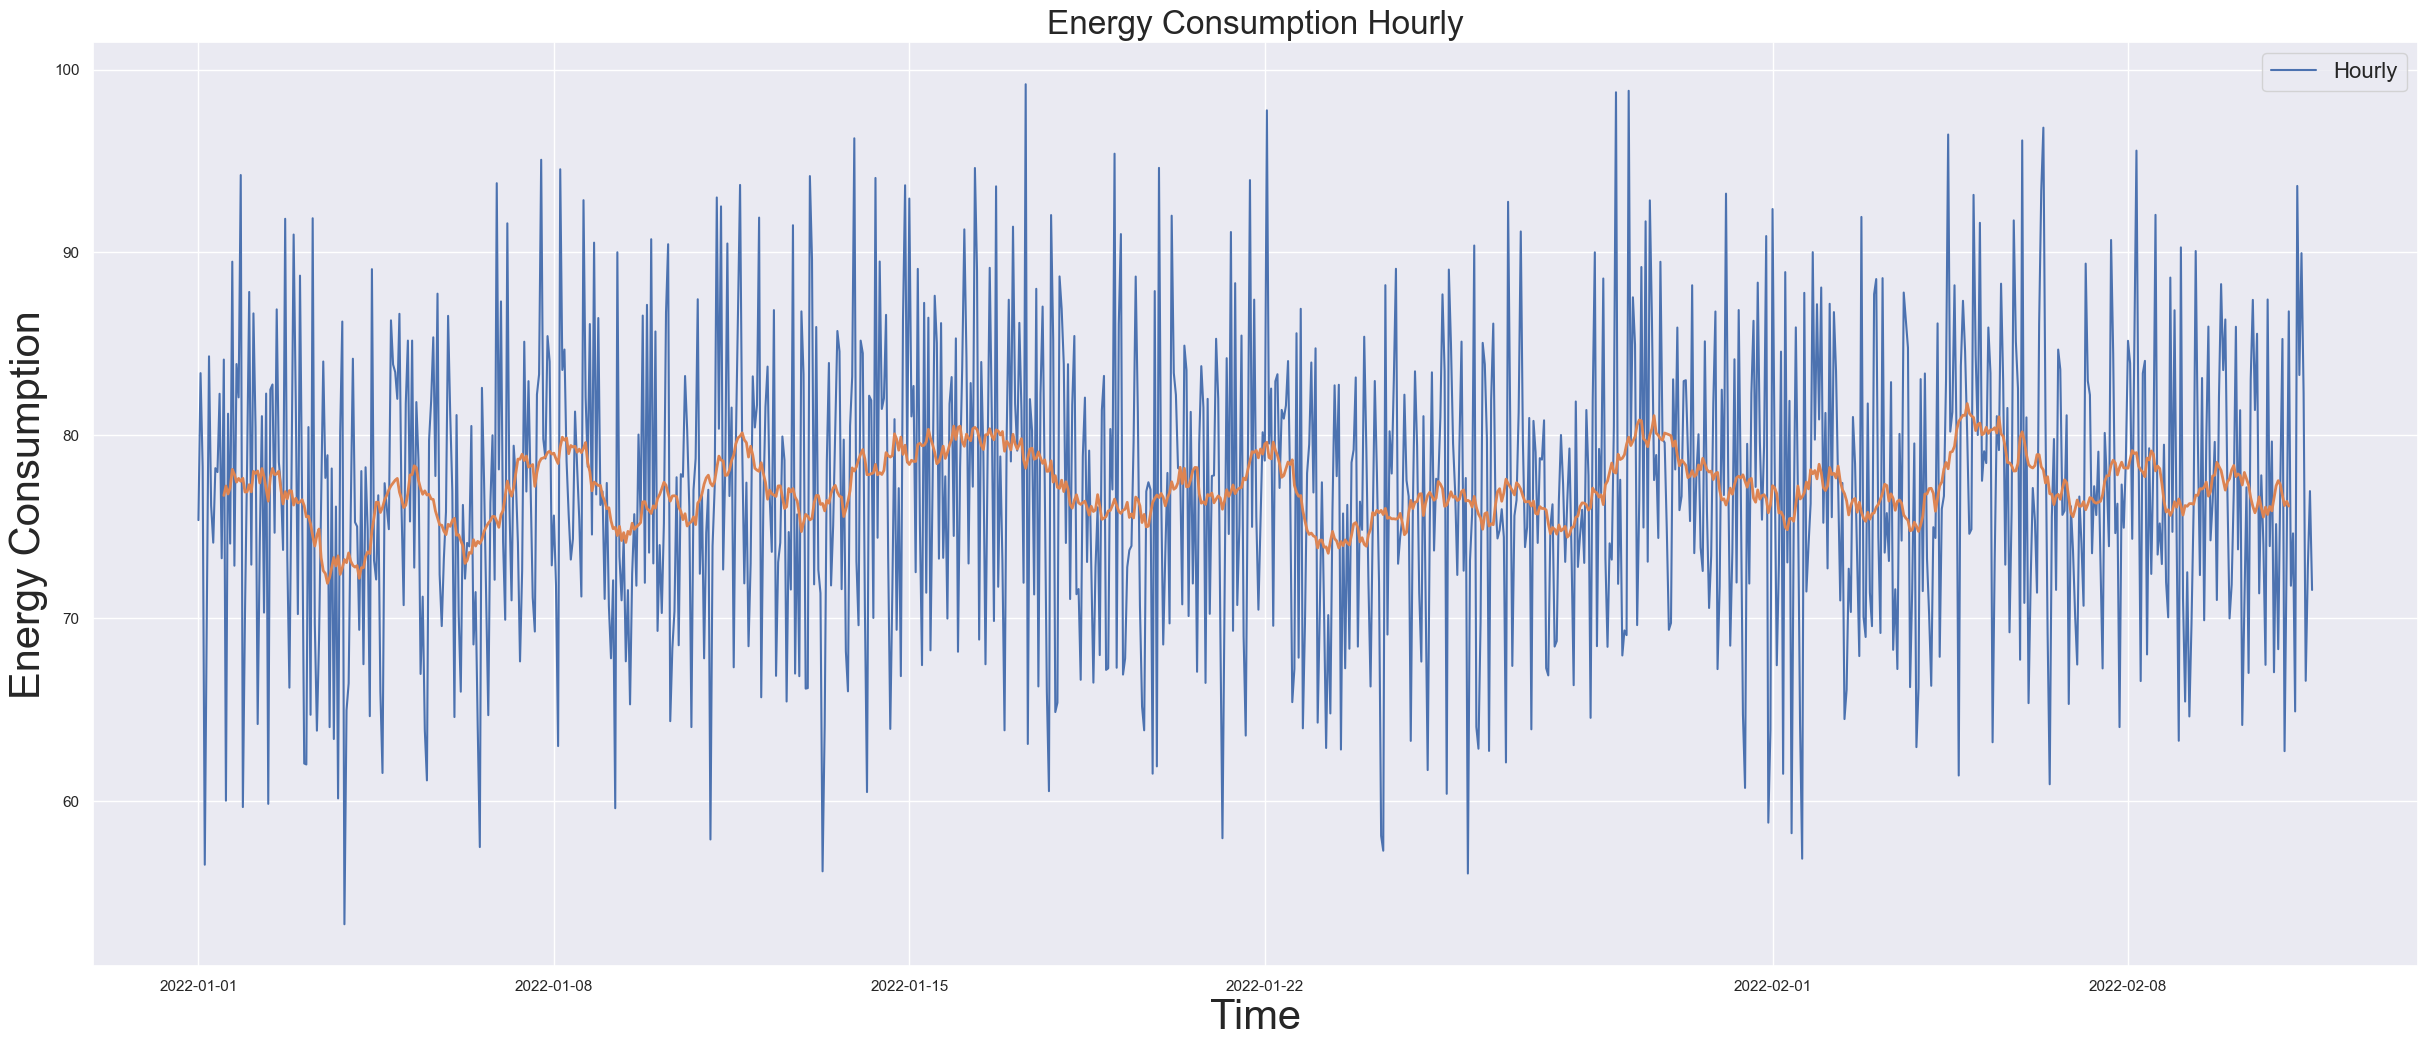

In [7]:
# Plot the hourly Energy Consumption, along with the weekly rolling mean
#The rolling mean of 'EnergyConsumption' with a window size of 24 (daily) is computed and plotted.
#This code aims to visualize the hourly energy consumption data along with its weekly rolling mean. The rolling mean helps to smooth out short-term fluctuations and highlight the underlying trend in the data.

#It is a technique used to smooth out short-term fluctuations in a time series and highlight the underlying trend or pattern. It is calculated by taking the average of a specific number of consecutive data points (called the window size) and moving this window through the data set.
rolling = energy_df['EnergyConsumption'].rolling(24, center=True).mean()
ax = plot_series(energy_df, 'EnergyConsumption', label='Hourly', ylabel='Energy Consumption',
                 title='Energy Consumption Hourly')
ax.plot(rolling, linestyle='-', linewidth=2, label='Weekly rolling mean')
plt.show()

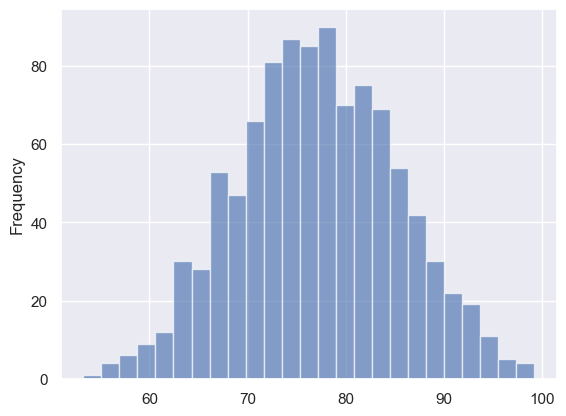

In [8]:
# Plot the histogram of the Energy Consumption
#The histogram of the 'EnergyConsumption' distribution is plotted to understand the spread of the data.
#bins  are intervals  into which the  data is divided
#In summary, the code you provided generates a histogram of the 'EnergyConsumption' column in your dataset, which is valuable for understanding the distribution and characteristics of your energy consumption data. By visually examining the histogram, you can gain insights into typical energy usage, variability, and potential outliers.
ax = energy_df['EnergyConsumption'].plot.hist(bins=25, alpha=0.65)

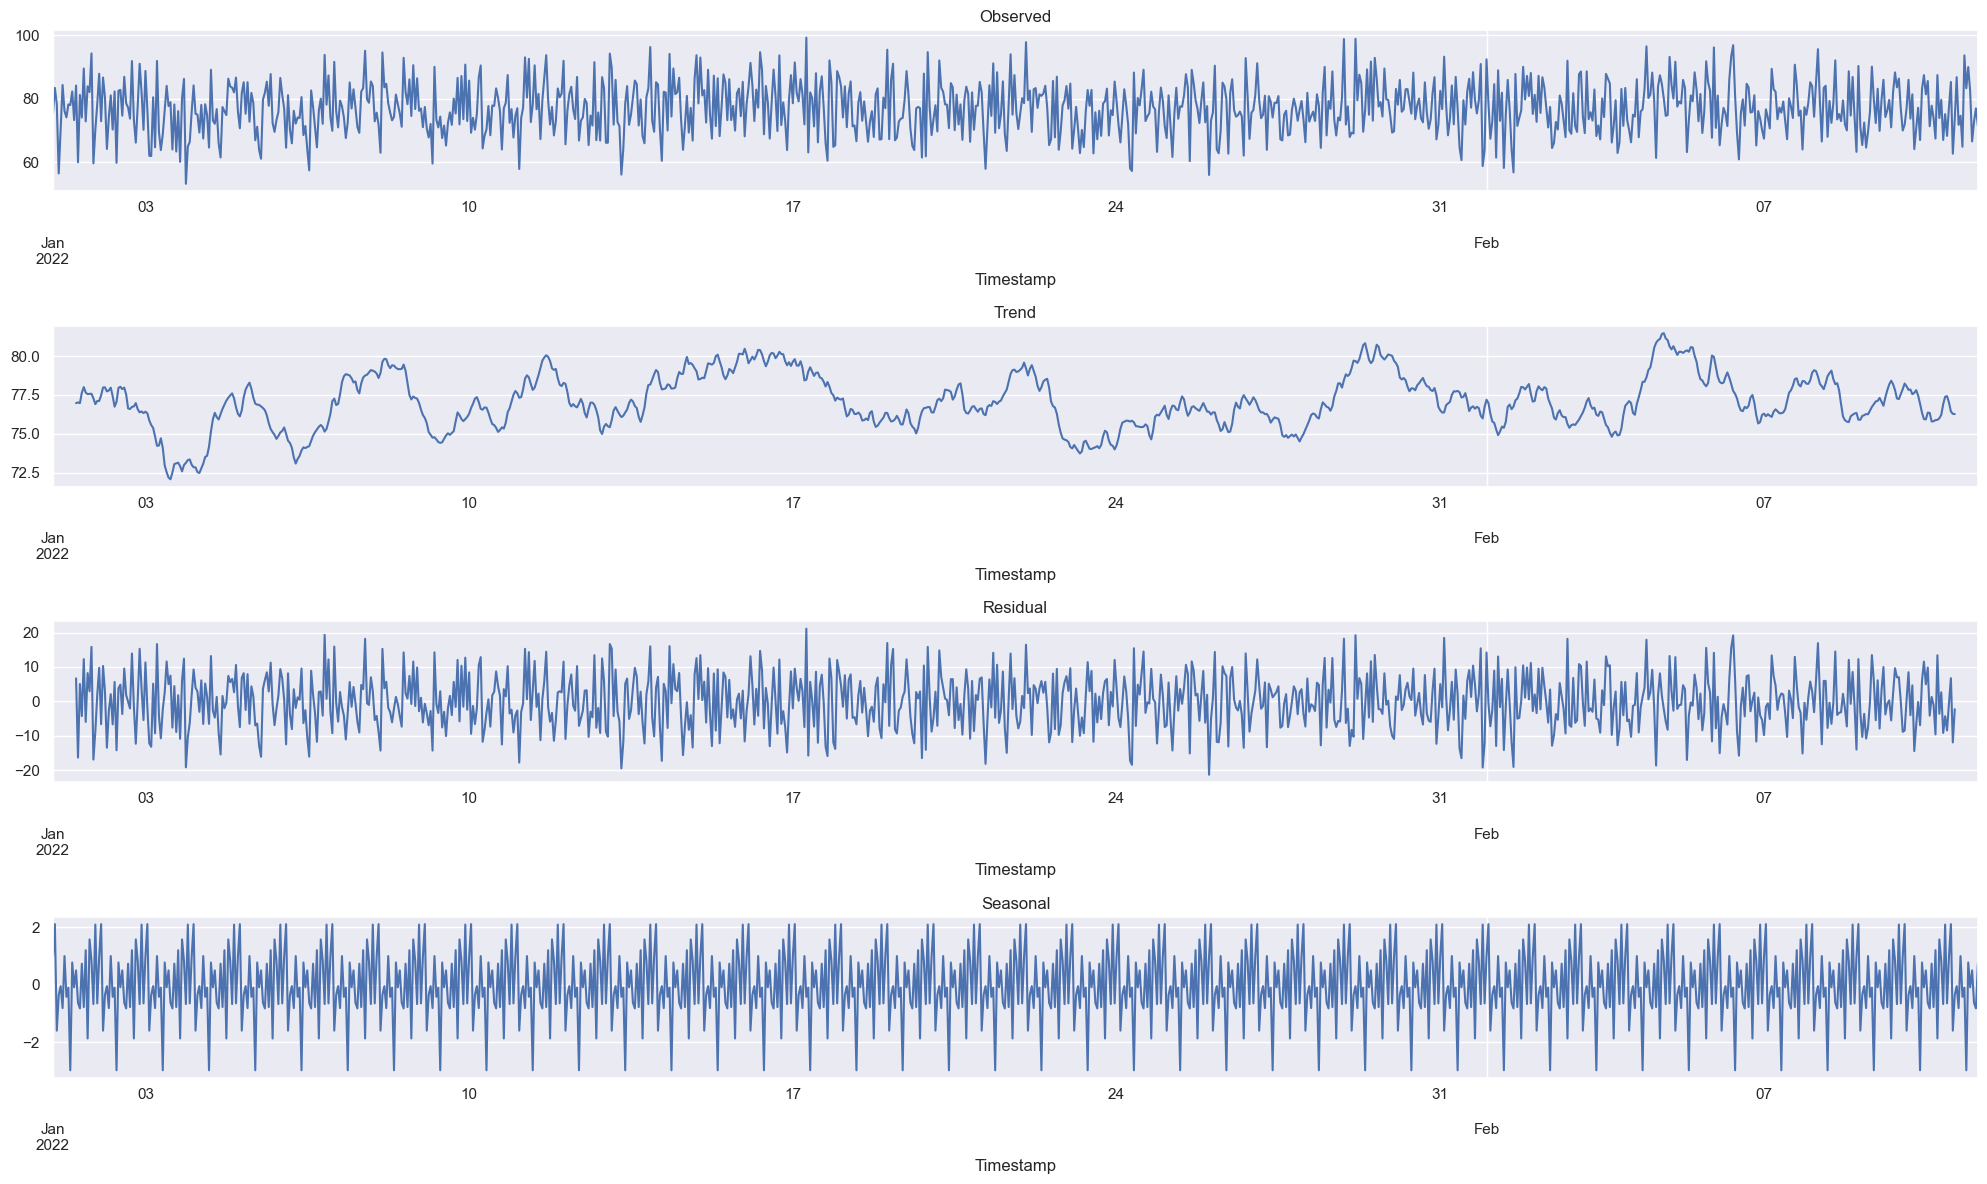

In [9]:
# Decompose the Energy Consumption time series

#The energy consumption data is decomposed into four components:
#Observed: The original series.
#Trend: The long-term pattern.
#Residual: The noise or irregular component.
#Seasonal: The repeating pattern at a specific frequency (e.g., daily or weekly).
#Each component is plotted for further analysis
!pip install statsmodels
import statsmodels.api as sm
#This code decomposes the energy consumption time series into its trend, seasonal, and residual components and then visualizes them in separate subplots. This allows for a better understanding of the underlying patterns and variations in the data.
res = sm.tsa.seasonal_decompose(energy_df['EnergyConsumption'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()

In [10]:
#This function visualizes multiple time series from the dataset (Temperature, Humidity, EnergyConsumption, etc.) on a grid of subplots.
#The function is used to visualize the first 7 days of data, split across two rows of plots.
#This function aims to visualize multiple time series from your dataset (like Temperature, Humidity, EnergyConsumption, etc.) on a grid of subplots. It's designed to provide a quick, initial visualization of your data

def show_raw_visualization(data, nrows, width, height):
    #time_data1 = data.index
    fig, axes = plt.subplots(
        nrows=nrows, ncols=2, figsize=(width, height), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = data.index
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{} - {}".format(key, titles[i]),
            rot=25,
        )
        ax.legend([titles[i]])
    plt.tight_layout()


In [11]:
colors = ["blue", "orange", "green", "red"]
titles = [ 'Temperature', 'Humidity', 'EnergyConsumption', 'RenewableEnergy']

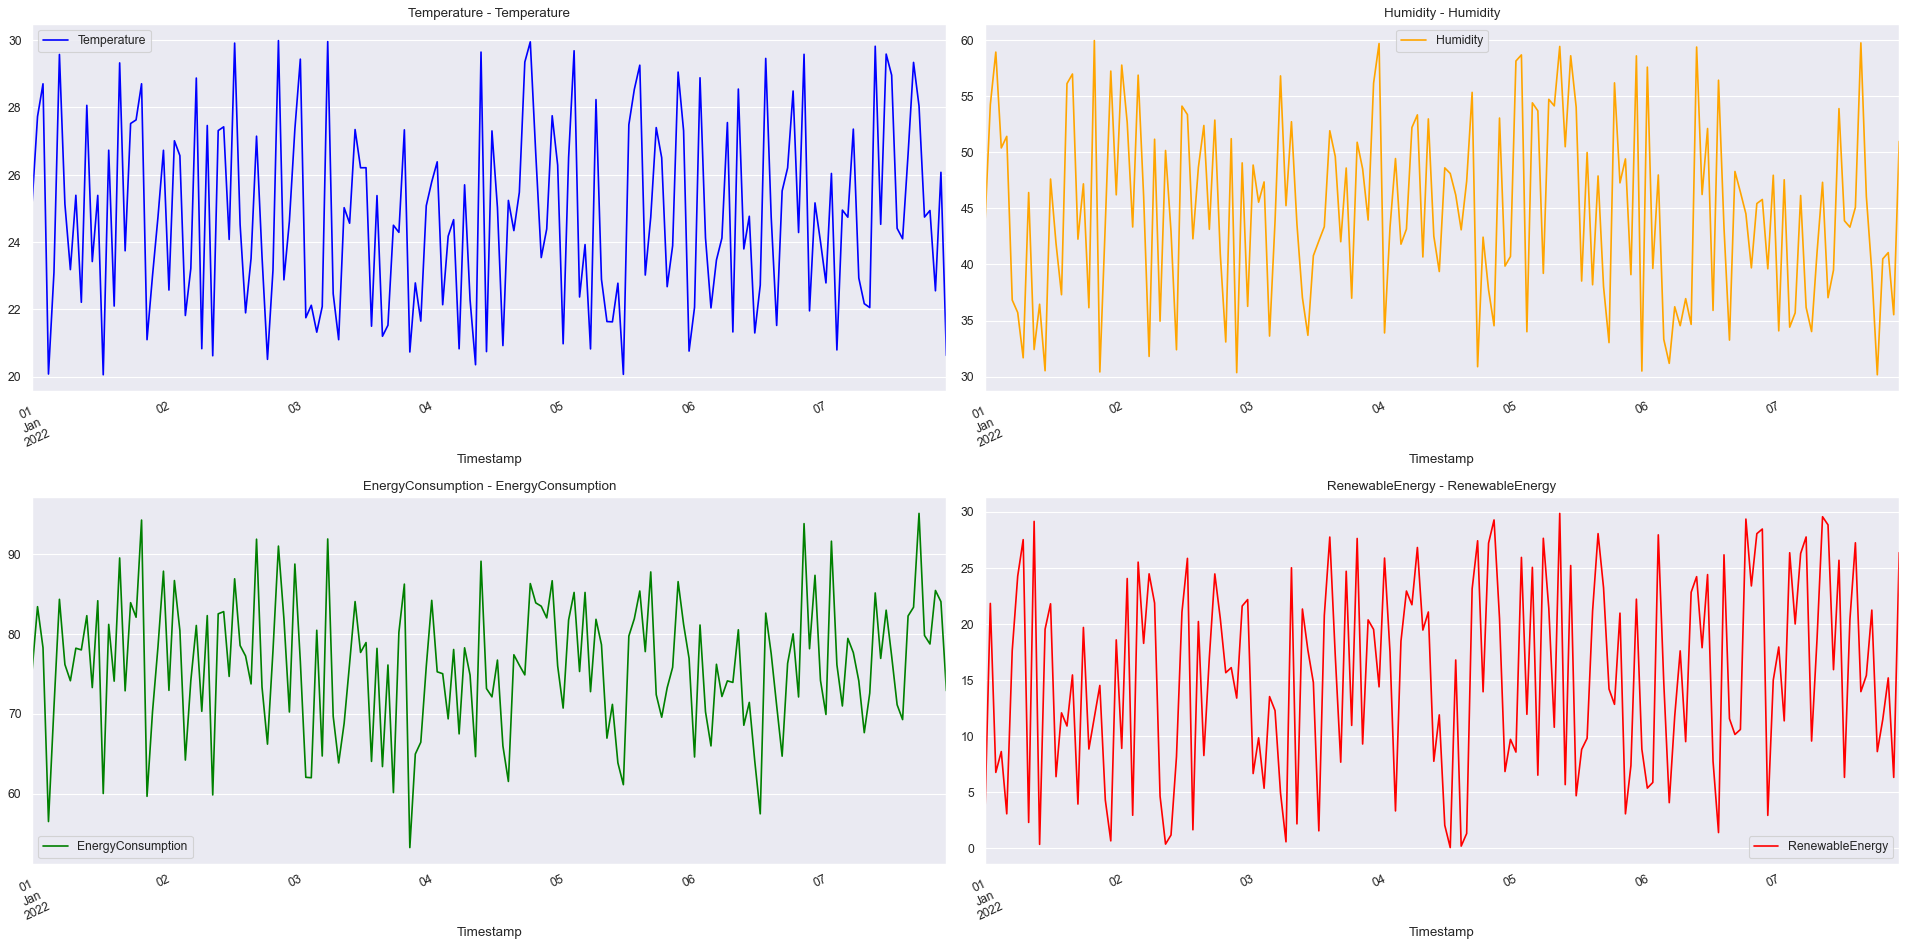

In [12]:
feature_keys = ['Temperature', 'Humidity', 'EnergyConsumption', 'RenewableEnergy']
show_raw_visualization(energy_df[:24*7],nrows=2,width=24,height=12)

In [13]:
energy_df.isnull().sum().sum()

0

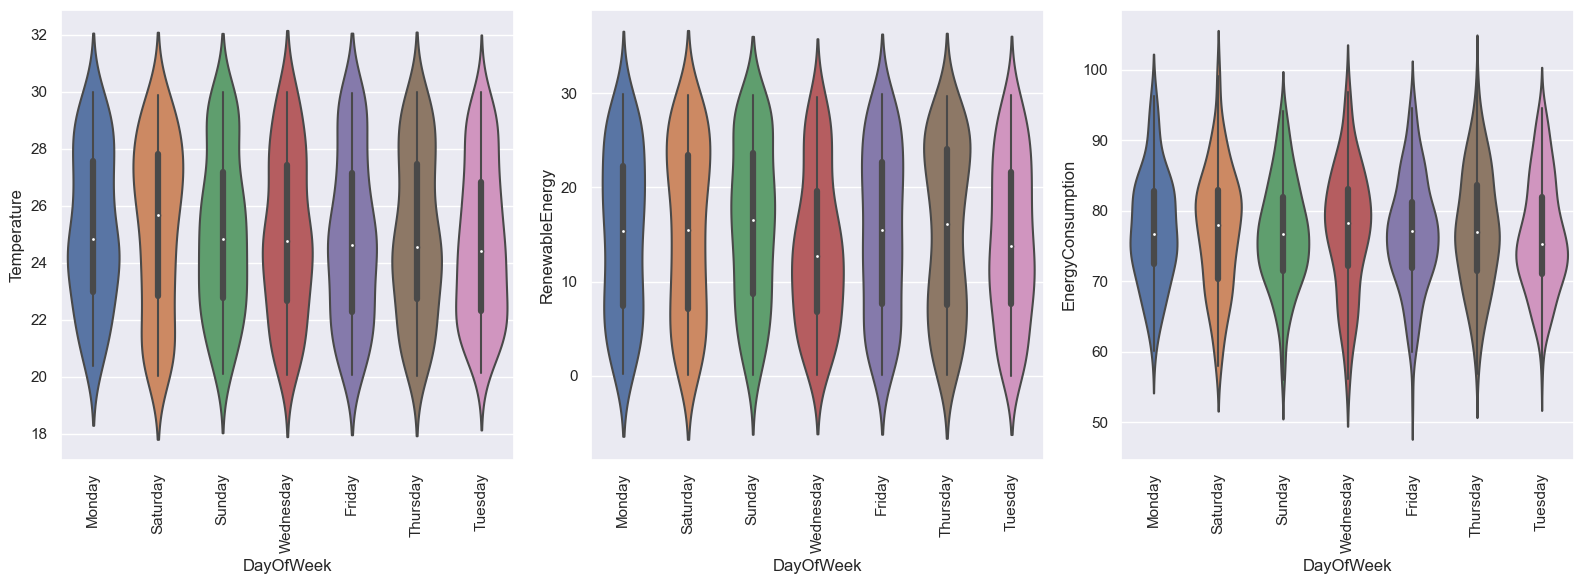

In [14]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'DayOfWeek', y = 'Temperature', data = energy_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,2)
sns.violinplot(x = 'DayOfWeek', y = 'RenewableEnergy', data = energy_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.subplot(1,3,3)
sns.violinplot(x = 'DayOfWeek', y = 'EnergyConsumption', data = energy_df)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
#This code creates three violin plots, each showing the distribution of a different variable ('Temperature', 'RenewableEnergy', 'EnergyConsumption') across the days of the week. This visualization helps in understanding how these variables vary and are potentially influenced by the day of the week.

In [15]:

#import plotly.express as px
#import plotly.figure_factory as ff

#fig = px.box(data_frame = energy_df,
            #x = "EnergyConsumption",
            #width = 1000,
            ##fig.update_layout({"template":"plotly_dark"})
#fig.show()

#This code creates a box plot using the plotly.express library to visualize the distribution of the 'EnergyConsumption' column in your energy_df DataFrame. Box plots are useful for identifying the median, quartiles, and potential outliers in a dataset.

In [16]:
#fig = px.box(data_frame = energy_df,
            #x = "RenewableEnergy",
           #width = 1000,
            #height = 300)
#fig.update_layout({"template":"plotly_dark"})
#fig.show()

In [17]:
#fig = px.box(data_frame = energy_df,
            #x = "Temperature",
            #width = 1000,
            #height = 300)
#fig.update_layout({"template":"plotly_dark"})
#fig.show()
# a box plot of renewable energy data provides valuable information about its central tendency, spread, and potential outliers. These insights are crucial for understanding, managing, and optimizing renewable energy resources.

In [18]:
cat = energy_df.select_dtypes(include="object")
cat
#This code aims to identify and extract columns in your energy_df DataFrame that contain categorical data (data represented as strings or objects).for preprocessing

,HVACUsage,LightingUsage,DayOfWeek,Holiday
Timestamp,,,,
2022-01-01 00:00:00+00:00,On,Off,Monday,No
2022-01-01 01:00:00+00:00,On,On,Saturday,No
2022-01-01 02:00:00+00:00,Off,Off,Sunday,No
2022-01-01 03:00:00+00:00,Off,On,Wednesday,No
2022-01-01 04:00:00+00:00,On,Off,Friday,No
...,...,...,...,...
2022-02-11 11:00:00+00:00,Off,Off,Saturday,No
2022-02-11 12:00:00+00:00,Off,On,Tuesday,Yes
2022-02-11 13:00:00+00:00,Off,On,Friday,Yes


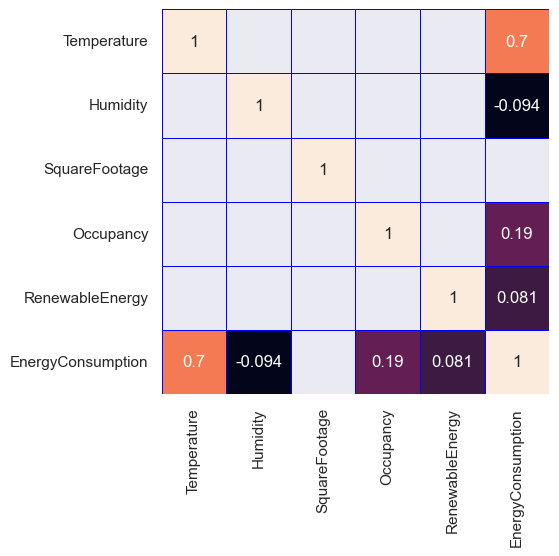

In [19]:
df=energy_df.drop(cat,axis=1).corr()
plt.figure(figsize=(5, 5))
sns.heatmap(df[(df>0.05)|(df<-0.05)],annot=True,cbar=False,linewidth=0.5,linecolor='blue');
#This code creates a heatmap to visualize the correlation between numerical features in your energy_df DataFrame, filtering out correlations that are close to zero (between -0.05 and 0.05). It helps identify relationships between different numerical variables

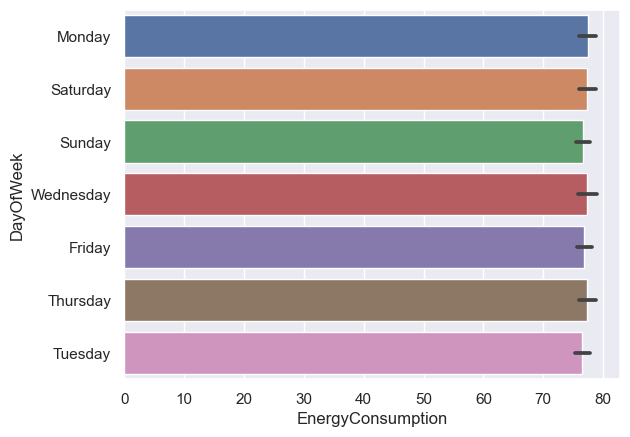

In [20]:
sns.barplot(data=energy_df,y="DayOfWeek", x="EnergyConsumption");
#This code creates a bar plot using the seaborn library to visualize the relationship between 'DayOfWeek' (categorical) and 'EnergyConsumption' (numerical) in your energy_df DataFrame. It shows the average energy consumption for each day of the week.

In [21]:
energy_df.EnergyConsumption.skew()
#This code calculates the skewness of the 'EnergyConsumption' column in your energy_df DataFrame. Skewness is a statistical measure that describes the asymmetry of the distribution of a dataset.
#Skewness = 0: The data is perfectly symmetrical (normal distribution).
#Skewness > 0 (Positive Skew): The distribution has a longer tail on the right side, indicating that there are more occurrences of higher energy consumption values.
#Skewness < 0 (Negative Skew): The distribution has a longer tail on the left side, indicating that there are more occurrences of lower energy consumption values

0.027398907453860765

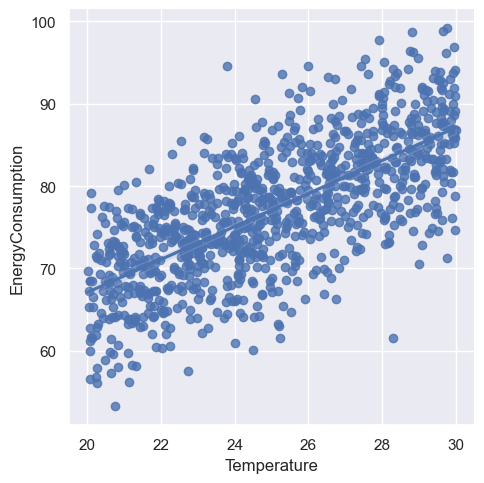

In [22]:
sns.lmplot(x ='Temperature', y ='EnergyConsumption', data = energy_df);
#This code creates a scatter plot with a fitted regression line using the seaborn library to visualize the relationship between 'Temperature' and 'EnergyConsumption' in your energy_df DataFrame. It helps understand how changes in temperature might affect energy consumption.

In [23]:
energy_df.dtypes

Temperature          float64
Humidity             float64
SquareFootage        float64
Occupancy              int64
HVACUsage             object
LightingUsage         object
RenewableEnergy      float64
DayOfWeek             object
Holiday               object
EnergyConsumption    float64
dtype: object

In [24]:
energy_df.columns

Index(['Temperature', 'Humidity', 'SquareFootage', 'Occupancy', 'HVACUsage',
       'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday',
       'EnergyConsumption'],
      dtype='object')

In [25]:
!pip install scikit-learn
from sklearn.preprocessing import LabelEncoder
object_cols = cat
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(energy_df[col])
    energy_df[col] = label_encoder.transform(energy_df[col])

In [26]:
#energy_df.set_index(['Timestamp'], inplace = True)

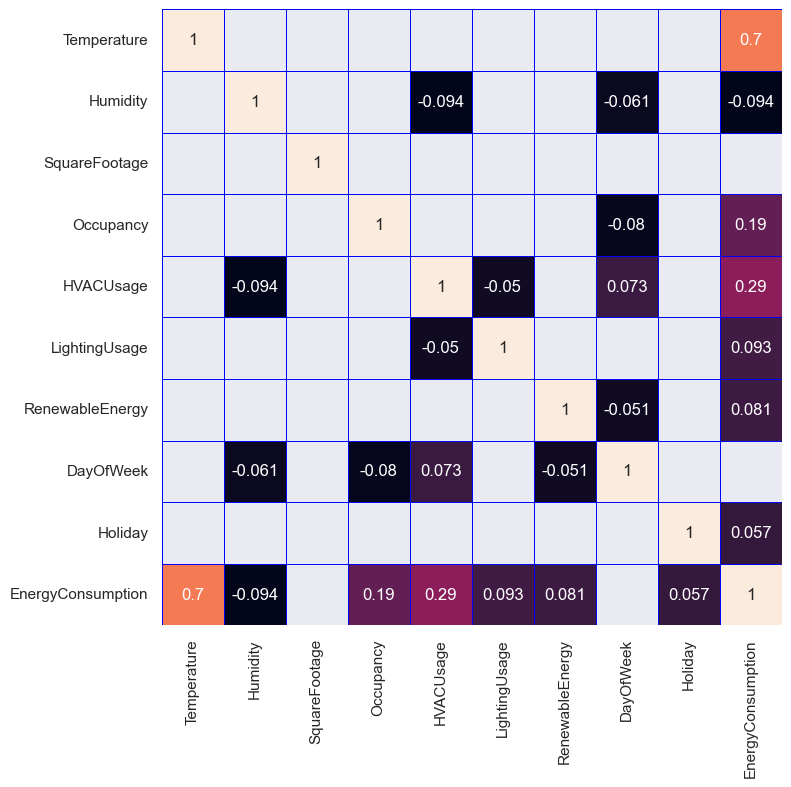

In [27]:
df=energy_df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(df[(df>0.05)|(df<-0.05)],annot=True,cbar=False,linewidth=0.5,linecolor='blue');

In [28]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

n_splits = 5

kf = TimeSeriesSplit(n_splits=n_splits)
features = ['Temperature', 'Humidity', 'SquareFootage', 'Occupancy',
            'HVACUsage', 'LightingUsage', 'RenewableEnergy', 'DayOfWeek', 'Holiday']

mae_scores = []
for train_idx, val_idx in kf.split(energy_df):
    X_train, X_val = energy_df[features].iloc[train_idx], energy_df[features].iloc[val_idx]
    y_train, y_val = energy_df['EnergyConsumption'].iloc[train_idx], energy_df['EnergyConsumption'].iloc[val_idx]

    model = XGBRegressor(enable_categorical=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    mae = mean_absolute_error(y_val, y_pred)
    mae_scores.append(mae)

mae_scores = np.array(mae_scores)
mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print(f"\033[031m\033[1m")
print("MAE scores for each fold:", mae_scores)
print(f"\033[034m\033[1m")
print(f"Mean MAE: {mean_mae:.2f} ± {std_mae:.2f}")


MAE scores for each fold: [4.79789324 4.70158302 4.97491826 4.54804933 4.44352155]

Mean MAE: 4.69 ± 0.19


In [29]:
import joblib
model_filename ='xgb_energy_model.pkl'
joblib.dump(model, model_filename)
print(f"model saved to{model_filename}")


model saved toxgb_energy_model.pkl
